In [34]:
!pip install tensorflow
!pip install keras
!pip install scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist


You should consider upgrading via the 'c:\users\risha\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\risha\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.

You should consider upgrading via the 'c:\users\risha\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [35]:

(train_X, train_Y), (test_X, test_Y) = mnist.load_data()


In [36]:


print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [37]:
train_Y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [38]:
train_X[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

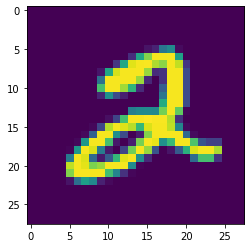

In [39]:
plt.imshow(train_X[5]);

In [40]:
train_X = train_X/255
test_X = test_X/255

In [41]:
train_X[5].shape

(28, 28)

In [42]:
small_train_X = train_X[:4000]
small_train_Y = train_Y[:4000]
small_test_X = train_X[4000:6000]
small_test_Y = train_Y[4000:6000]

In [43]:
small_train_X = small_train_X.reshape(4000,28*28)

In [44]:
small_test_X = small_test_X.reshape(2000,28*28)

In [53]:
small_test_X.shape

(2000, 784)

In [57]:
from scipy import stats
def predict2(k,X):
    prediction = []
    for row in X:
        distances = np.linalg.norm(small_train_X - row, axis=-1)
        top_distances_idx = distances.argsort()[:k]
        top_distance_classes = small_train_Y[top_distances_idx]
        prediction += list(stats.mode(top_distance_classes).mode)
    prediction = np.array(prediction)
    return prediction  

In [58]:
def score2(k,X,Y):
    P = predict2(k,X)
    accuracy = ((P==Y).sum())/len(X)
    return accuracy

In [59]:
for k in range(1,5):
    training_accuracy = score2(k,small_train_X,small_train_Y)
    testing_accuracy = score2(k, small_test_X, small_test_Y)
    print(f"Training accuracy for k={k}: {training_accuracy}")
    print(f"Testing accuracy for k={k}: {testing_accuracy}")



Training accuracy for k=1: 1.0
Testing accuracy for k=1: 0.933
Training accuracy for k=2: 0.9655
Testing accuracy for k=2: 0.924
Training accuracy for k=3: 0.96775
Testing accuracy for k=3: 0.925
Training accuracy for k=4: 0.961
Testing accuracy for k=4: 0.9245
